<a href="https://colab.research.google.com/github/jessicamensah/fraudulent-transactions-/blob/main/Fraudulent_Transactions_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook was created to correspond with the Curriculum Vitae submitted for the role of a Graduate Quantitative Analyst at Oodle Finance

This data was retrieved from Kaggle, its a dataset based on fraudulent transactions that have been made in cities within America. Data Cleaning,Visualisation and Machine Learning Algorithms were implemented to receive the best accuracy of the model.

# Loading the data

The libraries were imported so that specific can be used to reach our goal.

In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline as SklearnPipeline
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB

The dataset was imported onto the drive. Pandas was used to read the data for the output of the 'head' of the data, where all the labels and partial data is able to be seen.

In [205]:
df = "/content/drive/MyDrive/data/data2/1.csv"

In [206]:
df = pd.read_csv(df)

df.head()

,transaction_id,customer_id,merchant_id,amount,transaction_time,is_fraudulent,card_type,location,purchase_category,customer_age,transaction_description
0,1,1082,2027,5758.59,2023-01-01 00:00:00,0,MasterCard,City-30,Gas Station,43,Purchase at Merchant-2027
1,2,1015,2053,1901.56,2023-01-01 00:00:01,1,Visa,City-47,Online Shopping,61,Purchase at Merchant-2053
2,3,1004,2035,1248.86,2023-01-01 00:00:02,1,MasterCard,City-6,Gas Station,57,Purchase at Merchant-2035
3,4,1095,2037,7619.05,2023-01-01 00:00:03,1,Discover,City-6,Travel,59,Purchase at Merchant-2037
4,5,1036,2083,1890.10,2023-01-01 00:00:04,1,MasterCard,City-34,Retail,36,Purchase at Merchant-2083


# Data Wrangling (Mapping)

Data Wrangling was used to understand the data further, see if there are any outliers and the type of data it is as these attributes can easily affect the data visualisation and model implementation.

In [207]:
df['transaction_time'] = pd.to_datetime(df['transaction_time']) #transaction time being converted to date and time instead of an interger

In [208]:
print(df.dtypes)

transaction_id                      int64
customer_id                         int64
merchant_id                         int64
amount                            float64
transaction_time           datetime64[ns]
is_fraudulent                       int64
card_type                          object
location                           object
purchase_category                  object
customer_age                        int64
transaction_description            object
dtype: object


In [209]:
df.isnull().sum() #identifying the cells that have no values added, in other cases where this isnt filled, fill.na() will be used with the mean filled into the cells.

transaction_id             0
customer_id                0
merchant_id                0
amount                     0
transaction_time           0
is_fraudulent              0
card_type                  0
location                   0
purchase_category          0
customer_age               0
transaction_description    0
dtype: int64

# Exploratory Data Analysis

The EDA gives a thorough explanation of data with code to understand with data further and show which ways the data could be used.

In [210]:
avg_transaction_amount = df.groupby('purchase_category')['amount'].mean().reset_index() # the amount vs the purchase category was grouped

The bar plot below shows where all transactions were coming from, from there we can find out the highest place for fraudulent transactions

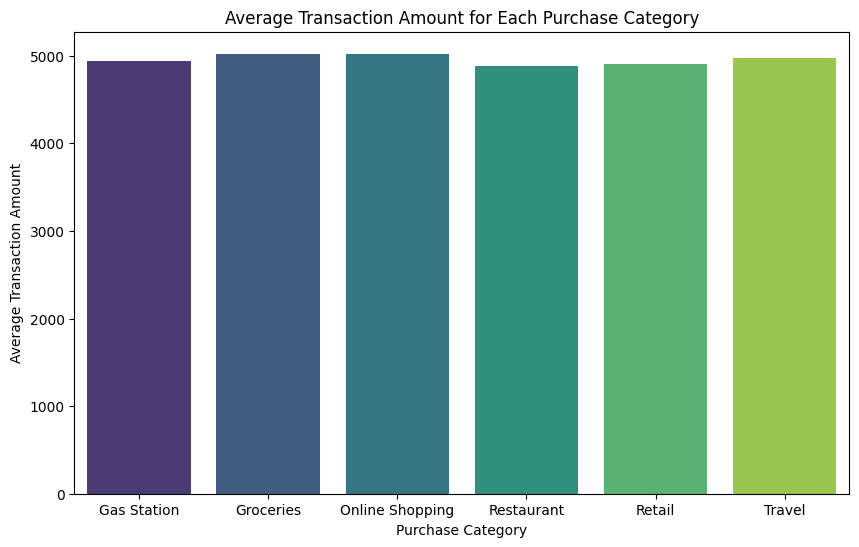

In [189]:
plt.figure(figsize=(10, 6))
sns.barplot(x='purchase_category', y='amount', data=avg_transaction_amount, palette='viridis')
plt.xlabel('Purchase Category')
plt.ylabel('Average Transaction Amount')
plt.title('Average Transaction Amount for Each Purchase Category')
plt.show()

Below is a dataframe that has been created for data that has been grouped as fraudlent

In [190]:
fraudulent_df = df[df['is_fraudulent'] == 1]

In [191]:
fraudulent_counts = fraudulent_df['location'].value_counts().reset_index()
fraudulent_counts.columns = ['location', 'count']

As portrayed below, there is alot of fraudulent transactions with occur within city 7 so that can be addressed.

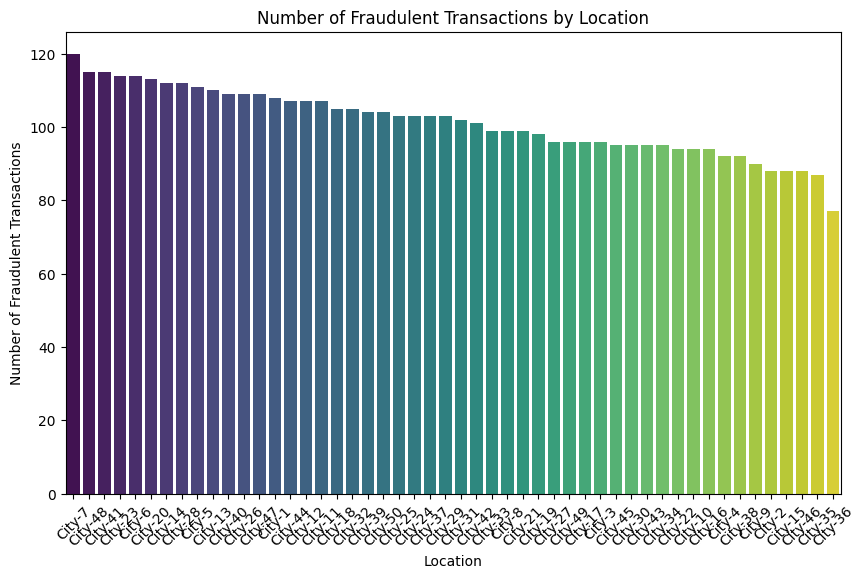

In [192]:
plt.figure(figsize=(10, 6))
sns.barplot(x='location', y='count', data=fraudulent_counts, palette='viridis')
plt.xlabel('Location')
plt.ylabel('Number of Fraudulent Transactions')
plt.title('Number of Fraudulent Transactions by Location')
plt.xticks(rotation=45)
plt.show()

As shown below, the heat map has no correlation or hot spot between the cities.

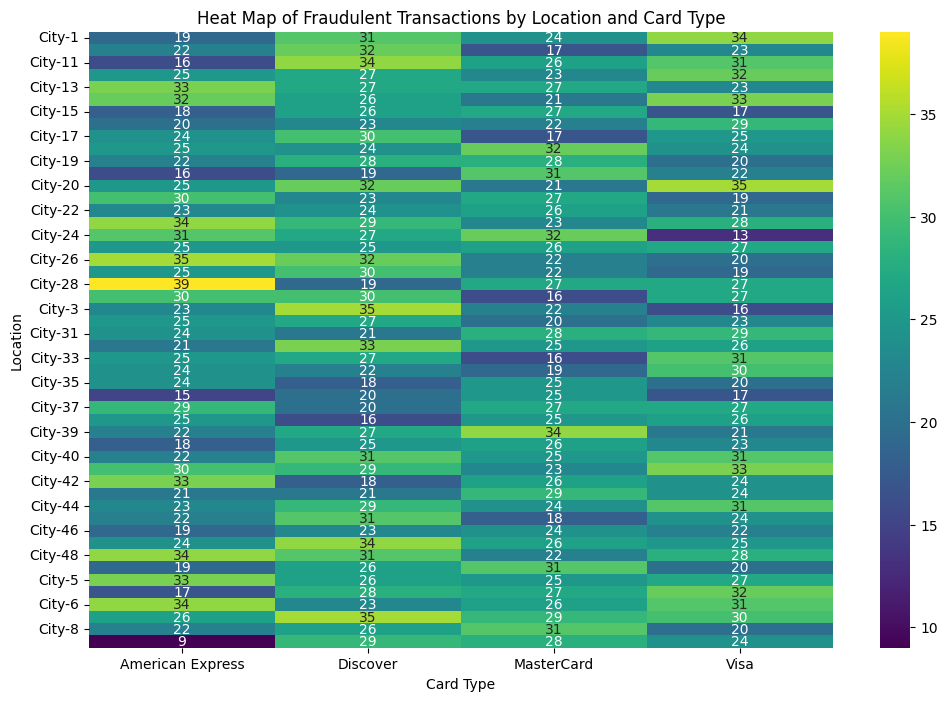

In [194]:
plt.figure(figsize=(12, 8))
sns.heatmap(fraudulent_pivot, annot=True, fmt="d", cmap='viridis')
plt.xlabel('Card Type')
plt.ylabel('Location')
plt.title('Heat Map of Fraudulent Transactions by Location and Card Type')
plt.show()

In [195]:
age_fraud_counts = df.groupby(['customer_age', 'is_fraudulent']).size().reset_index(name='count')

In graphs below, you are able to see the fraudulent customers by age and within this data, the highest rates of fraud is within 62 year olds and the lowest is 57 year olds which may be due to other factors.

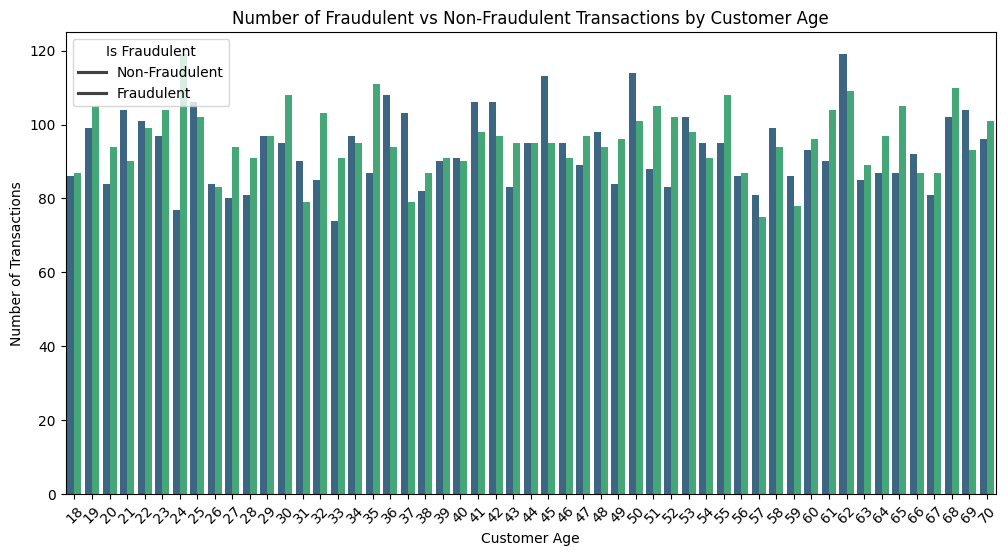

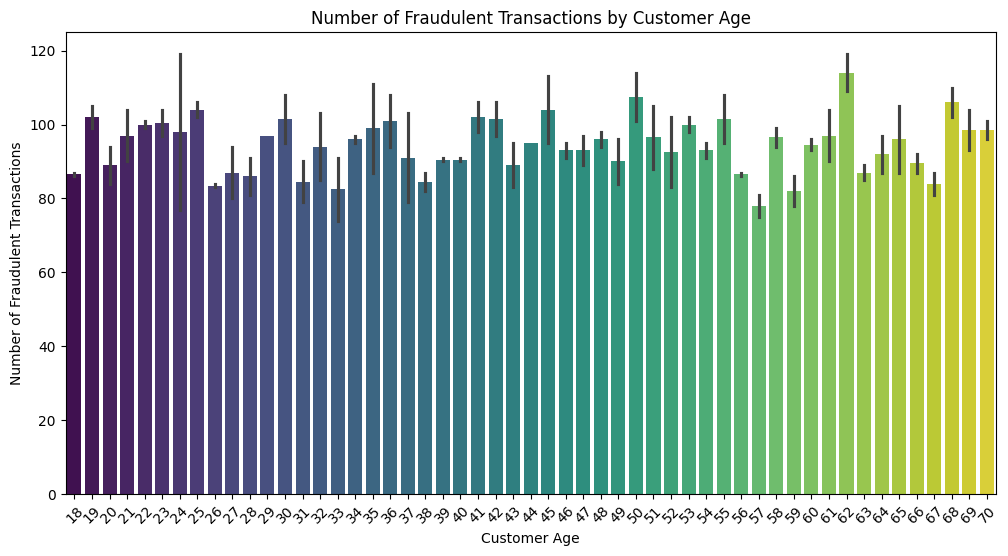

In [196]:
plt.figure(figsize=(12, 6))
sns.barplot(x='customer_age', y='count', hue='is_fraudulent', data=age_fraud_counts, palette='viridis')
plt.xlabel('Customer Age')
plt.ylabel('Number of Transactions')
plt.title('Number of Fraudulent vs Non-Fraudulent Transactions by Customer Age')
plt.legend(title='Is Fraudulent', labels=['Non-Fraudulent', 'Fraudulent'])
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='customer_age', y='count', data=age_fraud_counts, palette='viridis')
plt.xlabel('Customer Age')
plt.ylabel('Number of Fraudulent Transactions')
plt.title('Number of Fraudulent Transactions by Customer Age')
plt.xticks(rotation=45)
plt.show()

The tables below signify the variables data density.

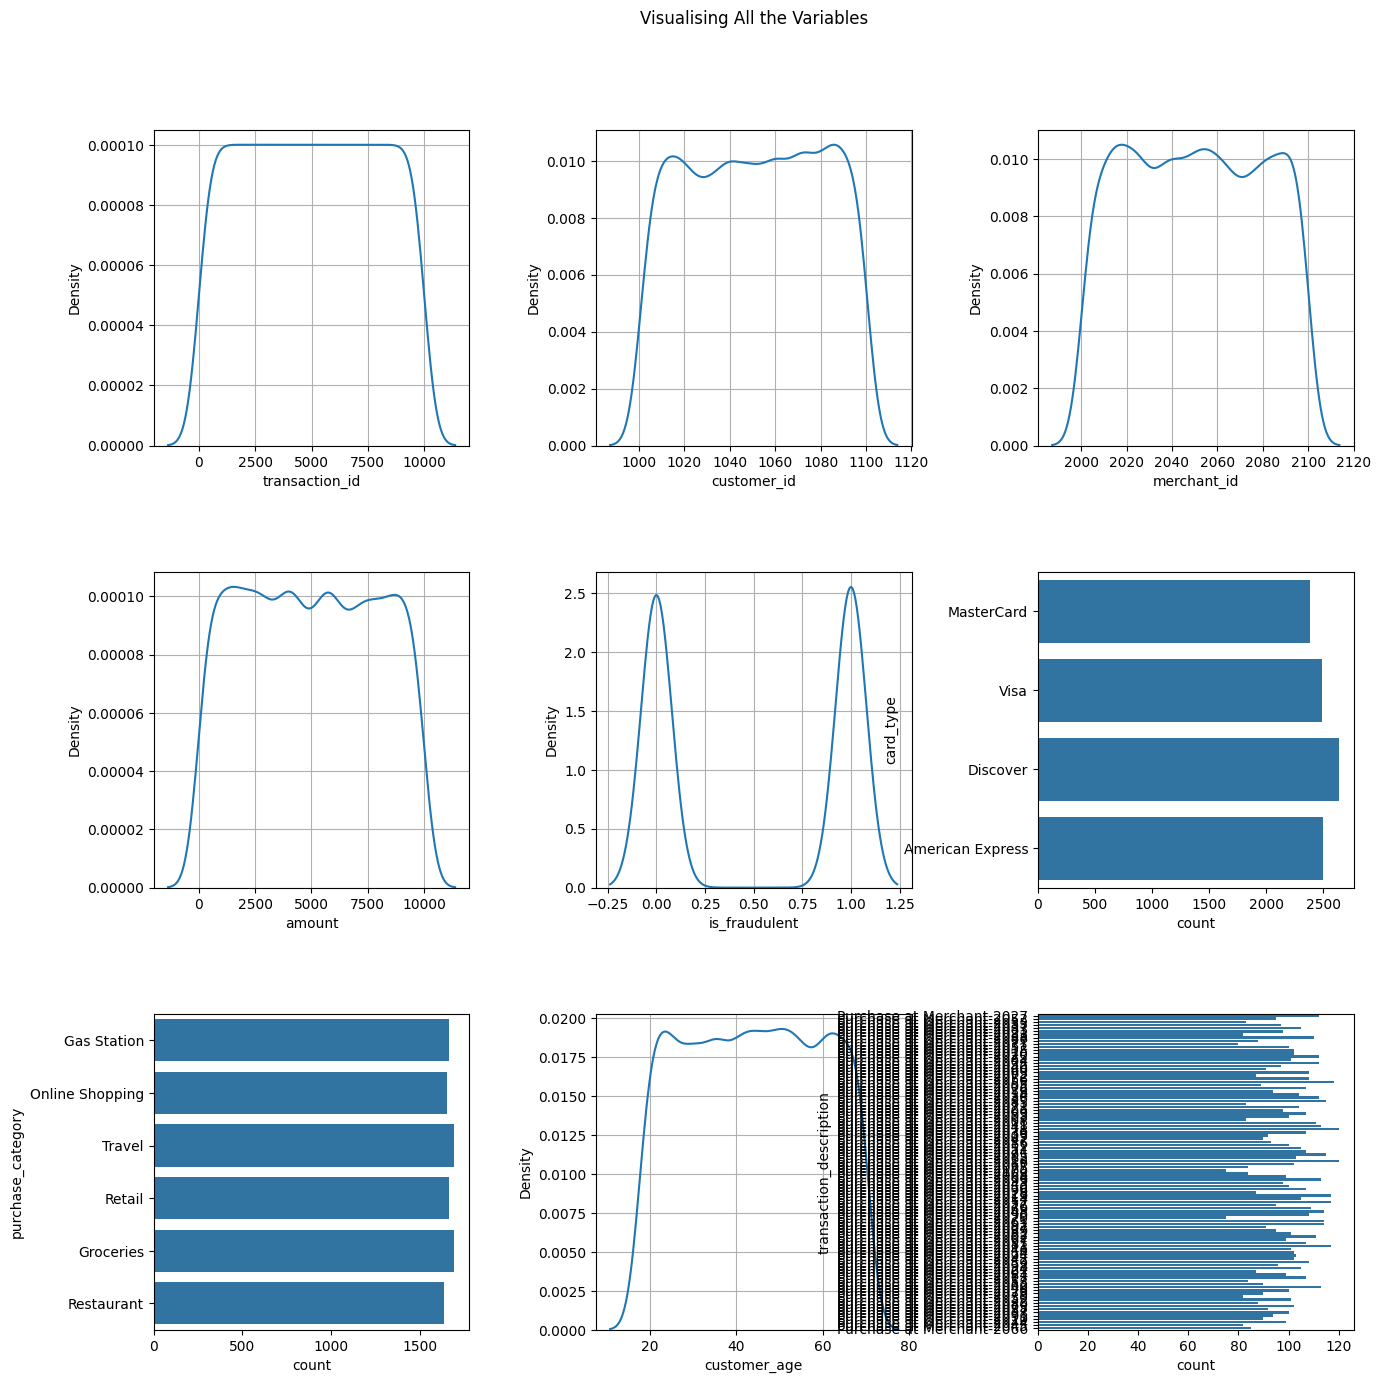

In [197]:
r = 3
c = 3

# Create a larger figure
plt.figure(figsize=(15, 15))  # Increase the size to 15x15 or adjust as needed

it = 1
for i in df.drop(['transaction_time','location'], axis=1).columns:
    plt.subplot(r, c, it)
    if df[i].dtype == 'object':
        sns.countplot(y=df[i])
    else:
        sns.kdeplot(df[i])
        plt.grid()
    it += 1

# Adjust the layout to provide more space around subplots
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.4, hspace=0.4)

# Add a title for the entire figure
plt.suptitle("Visualising All the Variables")

plt.show()

# Data Preprocessing

Some unwanted data was dropped and features were grouped so the process of implementing the Machine Learning Algorithms was feasible for the models. The data was also split into test and train so that a sample of the data is tested for accuracy.

In [198]:
df = df.drop(columns=['transaction_id','customer_id'])

In [199]:
X = df.drop(columns=['is_fraudulent'])
y = df['is_fraudulent']

In [200]:
categorical_features = ['card_type', 'location', 'purchase_category', 'transaction_description']
numerical_features = ['amount', 'customer_age']

In [201]:
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [202]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [203]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [211]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Logistic Regression

In [212]:
lg_model = SklearnPipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

In [213]:
# Fit the model to the training data
lg_model.fit(X_train, y_train)

y_pred = lg_model.predict(X_test)

# Print evaluation metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[727 722]
 [757 794]]

Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.50      0.50      1449
           1       0.52      0.51      0.52      1551

    accuracy                           0.51      3000
   macro avg       0.51      0.51      0.51      3000
weighted avg       0.51      0.51      0.51      3000



As shown above the data was giving an output of 50% accuracy which is low and this may be due to the model as logistic regression may not be the best model for this dataset

# XG Boost

In [214]:
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier

In [215]:
xgb_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(eval_metric='logloss', use_label_encoder=False))
])


In [216]:
xgb_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:29:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['amount', 'customer_age']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['card_type', 'location',
                                                   'purchase_...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [217]:
# Assuming 'preprocessor' is defined and handles the necessary transformations
y_pred = xgb_model.predict(X_test)

# Print evaluation metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[720 729]
 [772 779]]

Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.50      0.49      1449
           1       0.52      0.50      0.51      1551

    accuracy                           0.50      3000
   macro avg       0.50      0.50      0.50      3000
weighted avg       0.50      0.50      0.50      3000



# Decision Tree

The accuracy was starting to increase with the use of different models, however from other articleas and past work on the dataset, the change in models makes a slight difference.

In [218]:
decision_tree = DecisionTreeClassifier()

# Create a pipeline that combines preprocessing with the classifier
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', decision_tree)
])

# Train the model
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['amount', 'customer_age']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['card_type', 'location',
                                                   'purchase_category',
                                                   'transaction_description'])])),
                ('classifier', DecisionTreeClassifier())])

In [219]:
y_pred = model_pipeline.predict(X_test)

# Print evaluation metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[745 704]
 [774 777]]

Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.51      0.50      1449
           1       0.52      0.50      0.51      1551

    accuracy                           0.51      3000
   macro avg       0.51      0.51      0.51      3000
weighted avg       0.51      0.51      0.51      3000



Overall, data can have its biases as it is not a dataset with world-wide coverage. Also, the data was also a synthesised dataset which may be the reason why the accuracy score isnt changing. Other ways this can be increased may be data augmentation so making more fake data to change the outcome or the use of Deep Learning which could be implemented.